In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from data_matrix import cities, distance_matrix, cities2, distance_matrix2

In [3]:
def create_random_path(n):
    path = list(range(n))
    random.shuffle(path)
    return path

def fitness_function(path, dist_matrix):
    total = 0
    for i in range(len(path) - 1):
        total += dist_matrix[path[i]][path[i+1]]
    total += dist_matrix[path[-1]][path[0]]  # povratak
    return total

def tournament_selection(population, fitnesses, k=3):
    selected = random.sample(list(zip(population, fitnesses)), k)
    return min(selected, key=lambda x: x[1])[0]

def mutate(path, mutation_rate=0.1):
    if random.random() < mutation_rate:
        i, j = random.sample(range(len(path)), 2)
        path[i], path[j] = path[j], path[i]
    return path

def crossover(parent1, parent2):
    n = len(parent1)
    start, end = sorted(random.sample(range(n), 2))
    
    child = [None] * n
    
    child[start:end] = parent1[start:end]
    
    p2_items = [c for c in parent2 if c not in child]
    j = 0
    for i in range(n):
        if child[i] is None:
            child[i] = p2_items[j]
            j += 1
    return child


In [4]:
def genetic_algorithm(dist_matrix, cities, pop_size=50, generations=500, mutation_rate=0.1):
    n = len(cities)

    population = [create_random_path(n) for _ in range(pop_size)]
    
    best_path = None
    best_dist = float("inf")

    best_dist_per_gen = []
    avg_dist_per_gen = []

    for gen in range(generations):
        distances = [fitness_function(p, dist_matrix) for p in population]

        best_dist_per_gen.append(min(distances))
        avg_dist_per_gen.append(np.mean(distances))

        gen_best_idx = min(range(pop_size), key=lambda i: distances[i])
        if distances[gen_best_idx] < best_dist:
            best_dist = distances[gen_best_idx]
            best_path = population[gen_best_idx]

        new_population = []
        for _ in range(pop_size):
            parent1 = tournament_selection(population, distances)
            parent2 = tournament_selection(population, distances)
            child = crossover(parent1, parent2)
            child = mutate(child, mutation_rate)
            new_population.append(child)
        
        population = new_population
        
    plt.plot(best_dist_per_gen, label="Best solution")
    plt.plot(avg_dist_per_gen, label="Average solution")
    plt.xlabel("Generation")
    plt.ylabel("Path length")
    plt.legend()
    plt.show()

    return [cities[i] for i in best_path] + [cities[best_path[0]]], best_dist

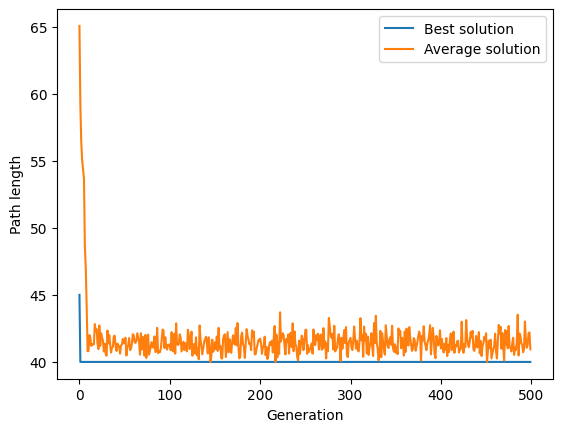

The best route: ['B', 'D', 'F', 'C', 'A', 'E', 'B']
Length: 40


In [20]:
best_path, best_dist = genetic_algorithm(distance_matrix, cities)
print("The best route:", best_path)
print("Length:", best_dist)

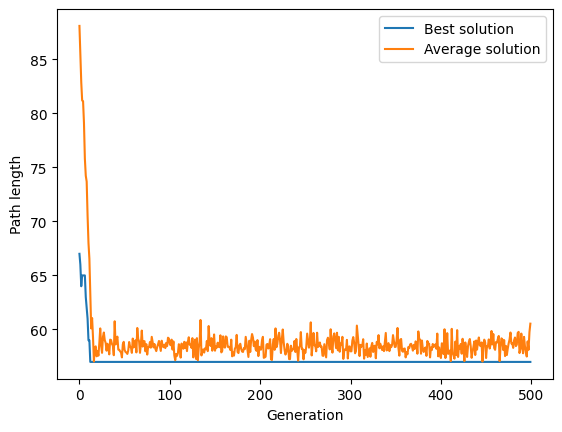

The best route: ['A', 'E', 'B', 'C', 'F', 'I', 'D', 'G', 'H', 'A']
Length: 57


In [5]:
best_path, best_dist = genetic_algorithm(distance_matrix2, cities2)
print("The best route:", best_path)
print("Length:", best_dist)